In [1]:
#### Import Lybraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
df= pd.read_csv('movies.csv',encoding='ISO-8859-1')
df.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [4]:
# Let look at the missing values 
for col in df.columns:
  per_missing = np.mean(df[col].isnull())
  print ('{} -- {}%'. format(col, per_missing))

budget -- 0.0%
company -- 0.0%
country -- 0.0%
director -- 0.0%
genre -- 0.0%
gross -- 0.0%
name -- 0.0%
rating -- 0.0%
released -- 0.0%
runtime -- 0.0%
score -- 0.0%
star -- 0.0%
votes -- 0.0%
writer -- 0.0%
year -- 0.0%


In [5]:
# Another way of finding the null in the dataset

df.isnull()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6816,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6817,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6818,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# Lets look at the data types 
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [7]:
# We will change the float dtypes to int64 for the column 'budget' and 'gross'

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

# df.dtypes

In [8]:
# Here we could see that the release date and the year column does not match. 
# So we are going to extract the year from the 'release date'
# And fro doing that we first need to change the col into string & extract the year from it.

df['realeased_year'] = df['released'].astype('str').str[:4]

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,realeased_year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [9]:
pd.set_option('display.max_rows' , None)

In [24]:
df ['company'].sort_values(ascending= False)
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,realeased_year
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,1986,0


In [25]:
df ['company'].drop_duplicates().sort_values(ascending= False)
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,realeased_year
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,1986,0


[]

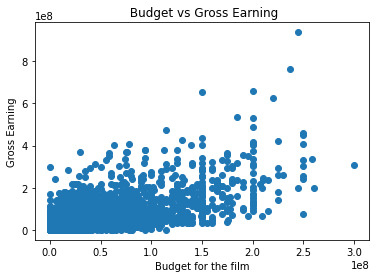

In [12]:
# Lets see which factor will have a high correlation with the Gorss revnue 
# I think that the company and the budget will have the high correlation 

# We will plot a scatter plot and look at the correlation 
# Scater plot with budget vs gross

plt.scatter(x = df['budget'], y= df['gross'])
plt.title(' Budget vs Gross Earning')
plt.xlabel('Budget for the film')
plt.ylabel('Gross Earning')
plt.plot()

<AxesSubplot:xlabel='budget', ylabel='gross'>

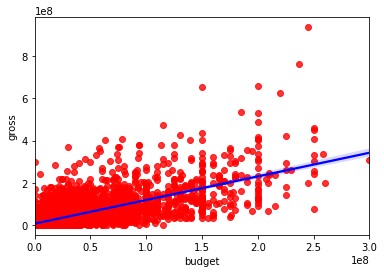

In [13]:
# plot the budget vs gross using seaborn

sns.regplot(x ='budget', y = 'gross',data =df,scatter_kws= {'color':'red'}, line_kws= {'color':'blue'})

In [14]:
# Correlation 
df.corr(method= 'pearson') # perarson, kendall, spearman

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


So we can see that there is high correlation between budget and gross 

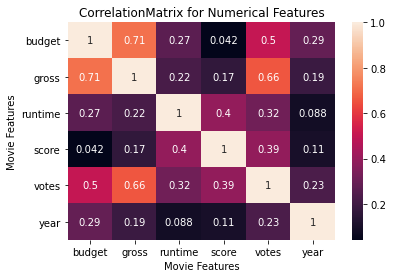

In [15]:
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('CorrelationMatrix for Numerical Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [16]:
# we will have to convert the object column to numerics and for that we will use cat.codes

df_numerized = df 

for column in df_numerized.columns:
    if (df_numerized[column].dtype == 'object'):
        df_numerized[column] = df_numerized[column].astype('category').cat.codes
        


In [17]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,realeased_year
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,1986,0


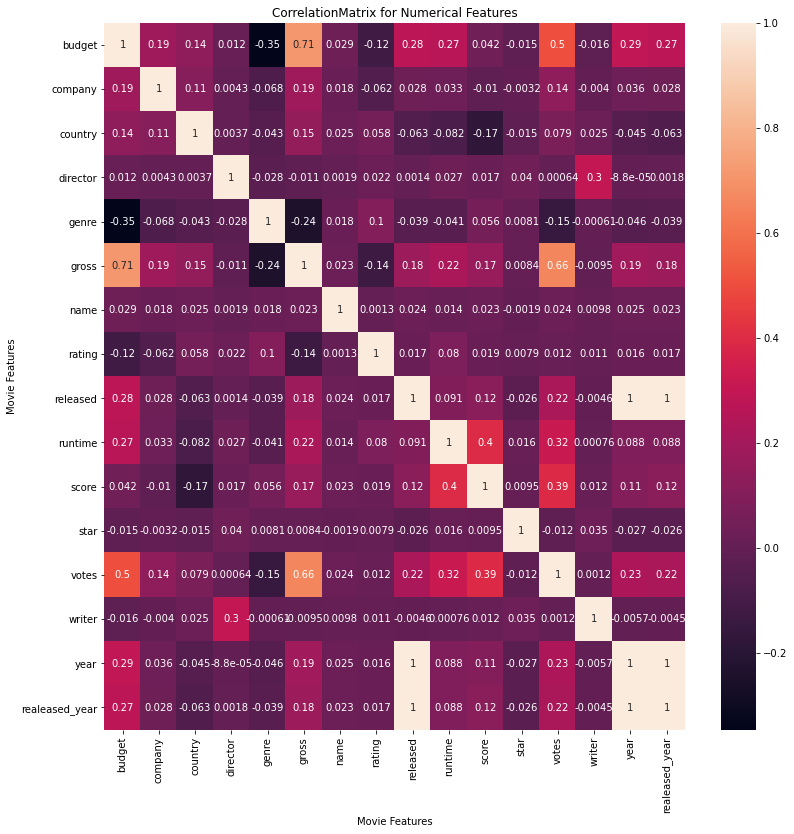

In [18]:
correlation_matrix =df_numerized.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(correlation_matrix, annot = True)
plt.title('CorrelationMatrix for Numerical Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

From the above graph we can see that the gross revenue is highly correlated to 'budget' and 'Votes'

In [19]:
corr_mat= df_numerized.corr(method= 'pearson')
corr_mat

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,realeased_year
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.276635,0.268226,0.042145,-0.015061,0.503924,-0.015611,0.291009,0.274820
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.027898,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.036272,0.028012
country,0.137635,0.107950,1.000000,0.003698,-0.042793,0.149988,0.025020,0.057979,-0.062609,-0.081796,-0.174414,-0.014566,0.078657,0.024981,-0.045204,-0.062707
director,0.011602,0.004320,0.003698,1.000000,-0.027668,-0.011429,0.001905,0.021926,0.001440,0.026779,0.017130,0.039813,0.000639,0.298997,-0.000088,0.001822
genre,-0.346794,-0.068330,-0.042793,-0.027668,1.000000,-0.242676,0.018062,0.100960,-0.039179,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.046259,-0.039014
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.178564,0.224579,0.165693,0.008382,0.662457,-0.009455,0.191548,0.176879
name,0.028712,0.018098,0.025020,0.001905,0.018062,0.022768,1.000000,0.001288,0.024120,0.013942,0.023342,-0.001910,0.023665,0.009821,0.024624,0.023411
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001288,1.000000,0.016696,0.079542,0.019271,0.007893,0.011678,0.010740,0.016221,0.017438
released,0.276635,0.027898,-0.062609,0.001440,-0.039179,0.178564,0.024120,0.016696,1.000000,0.091102,0.119577,-0.025504,0.221736,-0.004635,0.996187,0.999389
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,0.091102,1.000000,0.395343,0.016019,0.317399,0.000759,0.087639,0.088342


In [26]:
corr_mat= corr_mat.unstack()
corr_mat.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,realeased_year
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.276635,0.268226,0.042145,-0.015061,0.503924,-0.015611,0.291009,0.274820
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.027898,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.036272,0.028012
country,0.137635,0.107950,1.000000,0.003698,-0.042793,0.149988,0.025020,0.057979,-0.062609,-0.081796,-0.174414,-0.014566,0.078657,0.024981,-0.045204,-0.062707
director,0.011602,0.004320,0.003698,1.000000,-0.027668,-0.011429,0.001905,0.021926,0.001440,0.026779,0.017130,0.039813,0.000639,0.298997,-0.000088,0.001822
genre,-0.346794,-0.068330,-0.042793,-0.027668,1.000000,-0.242676,0.018062,0.100960,-0.039179,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.046259,-0.039014


In [21]:
sorted_pair= corr_mat.sort_values()
sorted_pair.head()

genre   budget    -0.346794
budget  genre     -0.346794
gross   genre     -0.242676
genre   gross     -0.242676
score   country   -0.174414
dtype: float64

In [22]:
high_corr= sorted_pair[(sorted_pair)>0.5]
high_corr

votes           budget            0.503924
budget          votes             0.503924
votes           gross             0.662457
gross           votes             0.662457
                budget            0.712196
budget          gross             0.712196
released        year              0.996187
year            released          0.996187
realeased_year  year              0.996229
year            realeased_year    0.996229
realeased_year  released          0.999389
released        realeased_year    0.999389
budget          budget            1.000000
writer          writer            1.000000
votes           votes             1.000000
star            star              1.000000
score           score             1.000000
runtime         runtime           1.000000
released        released          1.000000
rating          rating            1.000000
name            name              1.000000
gross           gross             1.000000
genre           genre             1.000000
director   

In [23]:
high_corr.sort_values(ascending= False)

realeased_year  realeased_year    1.000000
released        released          1.000000
budget          budget            1.000000
year            year              1.000000
votes           votes             1.000000
star            star              1.000000
score           score             1.000000
runtime         runtime           1.000000
writer          writer            1.000000
rating          rating            1.000000
gross           gross             1.000000
genre           genre             1.000000
director        director          1.000000
country         country           1.000000
company         company           1.000000
name            name              1.000000
released        realeased_year    0.999389
realeased_year  released          0.999389
                year              0.996229
year            realeased_year    0.996229
                released          0.996187
released        year              0.996187
budget          gross             0.712196
gross      

So we can conclude that the gross revenue has high correlation to 'budget' and 'Votes' and other features plays a role bt does not effect its gross revenue significantly